In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Gathering the Data

In [162]:
# load csv file 
csv_file = pd.read_csv('twitter-archive-enhanced.csv')

In [163]:
csv_file

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breath...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more thing...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you...,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/st...",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettabl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theor...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,None,None,None


In [164]:
# load tsv file
# https://stackoverflow.com/questions/18810777/how-do-i-read-a-response-from-python-requests
# https://www.codementor.io/aviaryan/downloading-files-from-urls-in-python-77q3bs0un

import requests

response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('image-predictions.tsv', 'wb') as outfile:
    outfile.write(response.content)

In [165]:
tsv_file = pd.read_csv('image-predictions.tsv', sep = '\t')

In [166]:
tsv_file.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
# https://stackoverflow.com/questions/38775997/getting-this-error-when-using-tweepy

import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# to fix rate limit, add wait_on_rate_limit
# https://vasisouv.github.io/twitter-api-tutorial/tutorial.html
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify = True)

In [ ]:
# get status, store it to list
# https://vasisouv.github.io/twitter-api-tutorial/tutorial.html
# https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json
# https://stackoverflow.com/questions/16267767/python-writing-json-to-file
# https://stackoverflow.com/questions/48157921/saving-tweets-to-json-file-in-python-3-6
# https://stackoverflow.com/questions/1483429/how-to-print-an-exception-in-python

tweets_list = []

for index, row in csv_file.iterrows():
    try:
        tweet = api.get_status(row['tweet_id'])
#             tweet_dict = {}
#             tweet_dict['tweet_id'] = row['tweet_id']
#             tweet_dict['favorite_count'] = tweet.favorite_count
#             tweet_dict['retweet_count'] = tweet.retweet_count
#             tweets_data.append(tweet_dict)
#             break
        tweets_list.append(tweet._json)
        #json.dump(tweet._json, outfile)
    except Exception as e:
        print(e)

[{u'message': u'No status found with that ID.', u'code': 144}]
[{u'message': u'No status found with that ID.', u'code': 144}]
[{u'message': u'No status found with that ID.', u'code': 144}]
[{u'message': u'No status found with that ID.', u'code': 144}]
[{u'message': u'No status found with that ID.', u'code': 144}]
[{u'message': u'No status found with that ID.', u'code': 144}]
[{u'message': u'No status found with that ID.', u'code': 144}]
[{u'message': u'No status found with that ID.', u'code': 144}]
[{u'message': u'No status found with that ID.', u'code': 144}]
[{u'message': u'No status found with that ID.', u'code': 144}]
[{u'message': u'No status found with that ID.', u'code': 144}]
[{u'message': u'No status found with that ID.', u'code': 144}]
[{u'message': u'No status found with that ID.', u'code': 144}]
[{u'message': u'No status found with that ID.', u'code': 144}]
[{u'message': u'No status found with that ID.', u'code': 144}]
[{u'message': u'No status found with that ID.', u'code'

In [9]:
# example of one tweet
tweets_list[0]

{u'contributors': None,
 u'coordinates': None,
 u'created_at': u'Tue Aug 01 16:23:56 +0000 2017',
 u'entities': {u'hashtags': [],
  u'media': [{u'display_url': u'pic.twitter.com/MgUWQ76dJU',
    u'expanded_url': u'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    u'id': 892420639486877696,
    u'id_str': u'892420639486877696',
    u'indices': [86, 109],
    u'media_url': u'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    u'media_url_https': u'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    u'sizes': {u'large': {u'h': 528, u'resize': u'fit', u'w': 540},
     u'medium': {u'h': 528, u'resize': u'fit', u'w': 540},
     u'small': {u'h': 528, u'resize': u'fit', u'w': 540},
     u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}},
    u'type': u'photo',
    u'url': u'https://t.co/MgUWQ76dJU'}],
  u'symbols': [],
  u'urls': [],
  u'user_mentions': []},
 u'extended_entities': {u'media': [{u'display_url': u'pic.twitter.com/MgUWQ76dJU',
    u'expanded_url': u'https

In [159]:
# save tweets to txt file
# https://stackoverflow.com/questions/25778021/how-can-i-save-a-list-of-dictionaries-to-a-file
import json

with open('tweet_json.txt', 'w') as outfile:
    json.dump(tweets_list, outfile)

In [168]:
# load json file
# https://chrisalbon.com/python/data_wrangling/load_json_file_into_pandas/

json_file = pd.read_json('tweet_json.txt')
json_file

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 89242063948687...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'med...",37562,False,NaN,892420643555336193,892420643555336192,...,NaN,NaN,NaN,8196,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'l..."
1,NaN,NaN,2017-08-01 00:17:27,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/aQFSeaCu9L',...",NaN,32289,False,NaN,892177421306343426,892177421306343424,...,NaN,NaN,NaN,6060,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",True,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'l..."
2,NaN,NaN,2017-07-31 00:18:03,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/r0YlrsGCgy',...",NaN,24334,False,NaN,891815181378084864,891815181378084864,...,NaN,NaN,NaN,4008,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,True,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'l..."
3,NaN,NaN,2017-07-30 15:58:51,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 89168955272479...","{'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'med...",40919,False,NaN,891689557279858688,891689557279858688,...,NaN,NaN,NaN,8352,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'l..."
4,NaN,NaN,2017-07-29 16:00:24,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/0g0KMIVXZ3',...",NaN,39109,False,NaN,891327558926688256,891327558926688256,...,NaN,NaN,NaN,9045,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",True,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'l..."
5,NaN,NaN,2017-07-29 00:08:17,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/xx5cilW0Dd',...",NaN,19671,False,NaN,891087950875897856,891087950875897856,...,NaN,NaN,NaN,3004,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breath...,True,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'l..."
6,NaN,NaN,2017-07-28 16:27:12,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/MV01Q820LT',...",NaN,11496,False,NaN,890971913173991426,890971913173991424,...,NaN,NaN,NaN,1985,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more thing...,True,"{'id': 4196983835, 'id_str': '4196983835', 'name': 

In [169]:
json_file.rename(columns={'id':'tweet_id'}, 
                 index={0:'zero',1:'one'}, 
                 inplace=True)

In [170]:
json_file

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,tweet_id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
zero,NaN,NaN,2017-08-01 16:23:56,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 89242063948687...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'med...",37562,False,NaN,892420643555336193,892420643555336192,...,NaN,NaN,NaN,8196,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'l..."
one,NaN,NaN,2017-08-01 00:17:27,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/aQFSeaCu9L',...",NaN,32289,False,NaN,892177421306343426,892177421306343424,...,NaN,NaN,NaN,6060,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",True,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'l..."
2,NaN,NaN,2017-07-31 00:18:03,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/r0YlrsGCgy',...",NaN,24334,False,NaN,891815181378084864,891815181378084864,...,NaN,NaN,NaN,4008,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,True,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'l..."
3,NaN,NaN,2017-07-30 15:58:51,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 89168955272479...","{'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'med...",40919,False,NaN,891689557279858688,891689557279858688,...,NaN,NaN,NaN,8352,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'l..."
4,NaN,NaN,2017-07-29 16:00:24,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/0g0KMIVXZ3',...",NaN,39109,False,NaN,891327558926688256,891327558926688256,...,NaN,NaN,NaN,9045,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",True,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'l..."
5,NaN,NaN,2017-07-29 00:08:17,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/xx5cilW0Dd',...",NaN,19671,False,NaN,891087950875897856,891087950875897856,...,NaN,NaN,NaN,3004,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breath...,True,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'l..."
6,NaN,NaN,2017-07-28 16:27:12,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/MV01Q820LT',...",NaN,11496,False,NaN,890971913173991426,890971913173991424,...,NaN,NaN,NaN,1985,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more thing...,True,"{'id': 4196983835, 'id_str': '4196983835

In [171]:
# get what we want only from the json file
json_output = json_file[['tweet_id', 'created_at', 'favorite_count', 'retweet_count']]

In [172]:
json_output.head()

,tweet_id,created_at,favorite_count,retweet_count
zero,892420643555336193,2017-08-01 16:23:56,37562,8196
one,892177421306343426,2017-08-01 00:17:27,32289,6060
2,891815181378084864,2017-07-31 00:18:03,24334,4008
3,891689557279858688,2017-07-30 15:58:51,40919,8352
4,891327558926688256,2017-07-29 16:00:24,39109,9045


In [173]:
# number of tweets with errors 
csv_file.shape[0] - json_output.shape[0]

19

## Gathering Summary:

* Getting data from an existing file(twitter-archive-enhanced.csv) and   
  reading it from csv file using pandas.

* Downloading(image-predictions.tsv) form the giving weepcode and reading   it from tsv file using requests.
* Querying an API (tweet_json.txt) Get JSON object of all the tweet_ids   
  using Tweepy.

# Assess

In [174]:
# to get sample from the csv_file
csv_file.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
106,871879754684805121,NaN,NaN,2017-06-06 00:01:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorabl...,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/871879754684805121/photo/1,https://twitter.com/dog_rates/st...",13,10,Lassie,None,None,None,None
1847,675820929667219457,NaN,NaN,2015-12-12 23:34:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a handful of sleepy puppers. All look unaware of their surroundings. Lousy guard dogs. St...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675820929667219457/photo/1,11,10,None,None,None,None,None
2266,667530908589760512,NaN,NaN,2015-11-20 02:32:25 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","Meet Naphaniel. He doesn't necessarily enjoy his day job, but he's damn good at it. 10/10 https:...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667530908589760512/photo/1,10,10,Naphaniel,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search ...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/st...",9,11,None,None,None,None,None
895,759159934323924993,NaN,NaN,2016-07-29 22:53:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: AT DAWN...\nWE RIDE\n\n11/10 https://t.co/QnfO7HEQGA,6.703191e+17,4.196984e+09,2015-11-27 19:11:49 +0000,"https://twitter.com/dog_rates/status/670319130621435904/photo/1,https://twitter.com/dog_rates/st...",11,10,None,None,None,None,None


In [175]:
# to get the csv_file info
csv_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [176]:
# to view descriptive statistics of twitter_archive
csv_file.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [177]:
# to get the tsv_file
tsv_file

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [178]:
# to get tsv_file info
tsv_file.info

<bound method DataFrame.info of                 tweet_id  \
0     666020888022790149   
1     666029285002620928   
2     666033412701032449   
3     666044226329800704   
4     666049248165822465   
5     666050758794694657   
6     666051853826850816   
7     666055525042405380   
8     666057090499244032   
9     666058600524156928   
10    666063827256086533   
11    666071193221509120   
12    666073100786774016   
13    666082916733198337   
14    666094000022159362   
15    666099513787052032   
16    666102155909144576   
17    666104133288665088   
18    666268910803644416   
19    666273097616637952   
20    666287406224695296   
21    666293911632134144   
22    666337882303524864   
23    666345417576210432   
24    666353288456101888   
25    666362758909284353   
26    666373753744588802   
27    666396247373291520   
28    666407126856765440   
29    666411507551481857   
...                  ...   
2045  886366144734445568   
2046  886680336477933568   
2047  8867368805

In [179]:
# to view descriptive statistics of tsv_file
tsv_file.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [180]:
# to get the json_file
json_file

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,tweet_id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
zero,NaN,NaN,2017-08-01 16:23:56,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 89242063948687...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'med...",37562,False,NaN,892420643555336193,892420643555336192,...,NaN,NaN,NaN,8196,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'l..."
one,NaN,NaN,2017-08-01 00:17:27,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/aQFSeaCu9L',...",NaN,32289,False,NaN,892177421306343426,892177421306343424,...,NaN,NaN,NaN,6060,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",True,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'l..."
2,NaN,NaN,2017-07-31 00:18:03,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/r0YlrsGCgy',...",NaN,24334,False,NaN,891815181378084864,891815181378084864,...,NaN,NaN,NaN,4008,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,True,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'l..."
3,NaN,NaN,2017-07-30 15:58:51,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 89168955272479...","{'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'med...",40919,False,NaN,891689557279858688,891689557279858688,...,NaN,NaN,NaN,8352,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'l..."
4,NaN,NaN,2017-07-29 16:00:24,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/0g0KMIVXZ3',...",NaN,39109,False,NaN,891327558926688256,891327558926688256,...,NaN,NaN,NaN,9045,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",True,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'l..."
5,NaN,NaN,2017-07-29 00:08:17,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/xx5cilW0Dd',...",NaN,19671,False,NaN,891087950875897856,891087950875897856,...,NaN,NaN,NaN,3004,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breath...,True,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'l..."
6,NaN,NaN,2017-07-28 16:27:12,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/MV01Q820LT',...",NaN,11496,False,NaN,890971913173991426,890971913173991424,...,NaN,NaN,NaN,1985,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more thing...,True,"{'id': 4196983835, 'id_str': '4196983835

In [181]:
# to get json_file info
json_file.info

<bound method DataFrame.info of       contributors  coordinates          created_at  \
zero           NaN          NaN 2017-08-01 16:23:56   
one            NaN          NaN 2017-08-01 00:17:27   
2              NaN          NaN 2017-07-31 00:18:03   
3              NaN          NaN 2017-07-30 15:58:51   
4              NaN          NaN 2017-07-29 16:00:24   
5              NaN          NaN 2017-07-29 00:08:17   
6              NaN          NaN 2017-07-28 16:27:12   
7              NaN          NaN 2017-07-28 00:22:40   
8              NaN          NaN 2017-07-27 16:25:51   
9              NaN          NaN 2017-07-26 15:59:51   
10             NaN          NaN 2017-07-26 00:31:25   
11             NaN          NaN 2017-07-25 16:11:53   
12             NaN          NaN 2017-07-25 01:55:32   
13             NaN          NaN 2017-07-25 00:10:02   
14             NaN          NaN 2017-07-24 17:02:04   
15             NaN          NaN 2017-07-24 00:19:32   
16             NaN          NaN 2

In [182]:
# to view descriptive statistics of json_file
json_file.describe()

,contributors,coordinates,favorite_count,geo,tweet_id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2337.000000,0.0,2.337000e+03,2.337000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2203.0,2203.0,2.600000e+01,2.600000e+01,2337.000000
mean,NaN,NaN,7851.236200,NaN,7.420692e+17,7.420692e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.0,0.0,8.113972e+17,8.113972e+17,2880.271288
std,NaN,NaN,12169.362882,NaN,6.824243e+16,6.824243e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.0,0.0,6.295843e+16,6.295843e+16,4866.070902
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,1.000000
25%,NaN,NaN,1365.000000,NaN,6.783345e+17,6.783345e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.0,0.0,7.761338e+17,7.761338e+17,580.000000
50%,NaN,NaN,3422.000000,NaN,7.185406e+17,7.185406e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.281173e+17,8.281173e+17,1346.000000
75%,NaN,NaN,9622.000000,NaN,7.986825e+17,7.986825e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.637581e+17,8.637581e+17,3357.000000
max,NaN,NaN,162315.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,82545.000000


In [183]:
# to get the counts for the rating_numerator
csv_file['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

# Quality

### csv_file

* the colums (in_reply_to_status_id) , (in_reply_to_user_id), (retweeted_status_id) , (retweeted_status_user_id) is supposed to be opject instead of float.
* the (retweeted_status_timestamp)and the (timestamp) supposed to be datetime instead of object (string).
* ther is sum sources difficult to read.
* the numerator and denominator columns have invalid values.
* In several columns null objects are non-null (None to NaN).
* the name columns having a not real names such as 'a', 'an' etc.
* replace missing dog type by (None).
* There are some of the retweets that start with (RT) and We don't want  
  them.

### tsv_file
* Some of the tweet_ids have the same jpg_url.
* Missing values from some images dataset.

### json_file
 * some of the tweet_id are duplicated. 


# Tidiness

* Join(doggo, floofer, pupper, puppo) in one column.
* Join 'tweet_info' and 'image_predictions' to 'twitter_archive'

# Cleaning the Data

In [184]:
# to make a copys for the dataframes
csv_cleann = csv_file.copy()
tsv_cleann = tsv_file.copy()
json_cleann = json_output.copy()

##### Define
Add tweet_info and image_predictions to twitter_archive table (csv_file)

##### Code

In [185]:
csv_cleann = pd.merge(left=csv_cleann,
                                 right=json_cleann, left_on='tweet_id', right_on='tweet_id', how='inner')
csv_cleann = csv_cleann.merge(tsv_cleann, on='tweet_id', how='inner')

##### Test

In [186]:
csv_cleann.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2064
Data columns (total 31 columns):
tweet_id                      2065 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2065 non-null object
source                        2065 non-null object
text                          2065 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2065 non-null object
rating_numerator              2065 non-null int64
rating_denominator            2065 non-null int64
name                          2065 non-null object
doggo                         2065 non-null object
floofer                       2065 non-null object
pupper                        2065 non-null object
puppo                         2065 non-null object
created_at                    2065 

In [187]:
# we got only rows with rating_denominator = 10
csv_cleann = csv_cleann[csv_cleann['rating_denominator']==10]

In [188]:
# check to only have rating_denominator == 10
csv_cleann.groupby(['rating_denominator']).count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
rating_denominator,,,,,,,,,,,,,,,,,,,,,
10,2047,22,22,2047,2047,2047,75,75,75,2047,...,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047


In [189]:
# loop through csv_cleann dataframe, change any value of rating_numerator if larger than 10, change it to 10
for index, row in csv_cleann.iterrows():
    if row['rating_numerator'] > 10:
        csv_cleann.set_value(index, 'rating_numerator', 10)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [190]:
# check our rating_numerator column for different values
csv_cleann.groupby(['rating_numerator']).count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
rating_numerator,,,,,,,,,,,,,,,,,,,,,
0,2,1,1,2,2,2,0,0,0,2,...,2,2,2,2,2,2,2,2,2,2
1,4,0,0,4,4,4,0,0,0,4,...,4,4,4,4,4,4,4,4,4,4
2,9,0,0,9,9,9,0,0,0,9,...,9,9,9,9,9,9,9,9,9,9
3,19,0,0,19,19,19,0,0,0,19,...,19,19,19,19,19,19,19,19,19,19
4,15,0,0,15,15,15,0,0,0,15,...,15,15,15,15,15,15,15,15,15,15
5,34,0,0,34,34,34,1,1,1,34,...,34,34,34,34,34,34,34,34,34,34
6,32,0,0,32,32,32,0,0,0,32,...,32,32,32,32,32,32,32,32,32,32
7,51,0,0,51,51,51,0,0,0,51,...,51,51,51,51,51,51,51,51,51,51
8,95,0,0,95,95,95,0,0,0,95,...,95,95,95,95,95,95,95,95,95,95


##### Denfine
 Geting the right datatype 

##### Code

In [191]:
csv_cleann['in_reply_to_status_id'] = csv_cleann['in_reply_to_status_id'].astype('object')
csv_cleann['in_reply_to_user_id'] = csv_cleann['in_reply_to_user_id'].astype('object')
csv_cleann['retweeted_status_id'] = csv_cleann['retweeted_status_id'].astype('object')
csv_cleann['retweeted_status_user_id'] = csv_cleann['retweeted_status_user_id'].astype('object')
csv_cleann['tweet_id'] = csv_cleann['tweet_id'].astype(str)
csv_cleann['timestamp'] = pd.to_datetime(csv_cleann['timestamp'])
# csv_clean['source'] = csv_clean['source'].astype('category')
# csv_clean['img_num_x'] = csv_clean['img_num_x'].astype('category')
# csv_cleann['dog_type'] = csv_cleann['dog_type'].astype('category')


###### Test

In [192]:
csv_cleann.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 0 to 2064
Data columns (total 31 columns):
tweet_id                      2047 non-null object
in_reply_to_status_id         22 non-null object
in_reply_to_user_id           22 non-null object
timestamp                     2047 non-null datetime64[ns]
source                        2047 non-null object
text                          2047 non-null object
retweeted_status_id           75 non-null object
retweeted_status_user_id      75 non-null object
retweeted_status_timestamp    75 non-null object
expanded_urls                 2047 non-null object
rating_numerator              2047 non-null int64
rating_denominator            2047 non-null int64
name                          2047 non-null object
doggo                         2047 non-null object
floofer                       2047 non-null object
pupper                        2047 non-null object
puppo                         2047 non-null object
created_at                    

##### Define
Merge the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column 'dog_type'.


##### Code

In [193]:
# Select the columns tha we ont 
dogs_columns = ['doggo', 'floofer', 'pupper', 'puppo']
STAY_COLUMNS = [x for x in csv_cleann.columns.tolist() if x not in dogs_columns]


# Melt the the columns into values
csv_cleann = pd.melt(csv_cleann, id_vars = STAY_COLUMNS, value_vars = dogs_columns, 
                         var_name = 'stages', value_name = 'dog_type')
# Delete column 'stages'
csv_cleann = csv_cleann.drop('stages', 1)


##### Test

In [194]:
print(csv_cleann.dog_type.value_counts())
print(len(csv_cleann))

None       7854
pupper      222
doggo        80
puppo        24
floofer       8
Name: dog_type, dtype: int64
8188


##### Define

Now will clean the data that we dont need and the no finde tweets

##### Code

In [195]:
# to delete the retweets that we dont need
csv_cleann= csv_cleann[pd.isnull(csv_cleann.retweeted_status_id)]

In [147]:
# to delete duplicated tweet_id
#csv_clean= csv_clean.drop_duplicates()
#return csv_clean.to_dict(orient="records")

In [35]:
# Delete tweets with no pictures
#csv_clean = csv_clean.dropna(subset = ['jpg_url'])

In [196]:
# to test
len(csv_cleann)

7888

##### Define
delet the columns tha we dont need

##### Code

In [197]:
csv_cleann.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7888 entries, 0 to 8187
Data columns (total 28 columns):
tweet_id                      7888 non-null object
in_reply_to_status_id         88 non-null object
in_reply_to_user_id           88 non-null object
timestamp                     7888 non-null datetime64[ns]
source                        7888 non-null object
text                          7888 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 7888 non-null object
rating_numerator              7888 non-null int64
rating_denominator            7888 non-null int64
name                          7888 non-null object
created_at                    7888 non-null datetime64[ns]
favorite_count                7888 non-null int64
retweet_count                 7888 non-null int64
jpg_url                       7888 non-null object
img_num                    

In [198]:
csv_cleann.drop(['jpg_url','expanded_urls','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

In [38]:
# Delete the columns I won't be using as they shouldn't be useful in the analysis.
#csv_cleann.drop(['in_reply_to_status_id_x','in_reply_to_status_id_y','in_reply_to_status_id_str','in_reply_to_user_id_x','in_reply_to_user_id_y','in_reply_to_user_id_str','p1','p1_conf','p1_dog', 'p2','p2_conf', 'p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

In [199]:
# to delete columns related to retweet we don't need anymore
csv_cleann = csv_cleann.drop('retweeted_status_id', 1)
csv_cleann = csv_cleann.drop('retweeted_status_user_id', 1)
csv_cleann = csv_cleann.drop('retweeted_status_timestamp', 1)

In [200]:
csv_cleann = csv_cleann.drop('in_reply_to_status_id', 1)
csv_cleann = csv_cleann.drop('in_reply_to_user_id', 1)

In [201]:
csv_cleann.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7888 entries, 0 to 8187
Data columns (total 12 columns):
tweet_id              7888 non-null object
timestamp             7888 non-null datetime64[ns]
source                7888 non-null object
text                  7888 non-null object
rating_numerator      7888 non-null int64
rating_denominator    7888 non-null int64
name                  7888 non-null object
created_at            7888 non-null datetime64[ns]
favorite_count        7888 non-null int64
retweet_count         7888 non-null int64
img_num               7888 non-null int64
dog_type              7888 non-null object
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 801.1+ KB


In [202]:
# to delete dog_stage duplicates
csv_cleann = csv_cleann.sort_values('dog_type').drop_duplicates('tweet_id', keep = 'last')

In [203]:
csv_cleann

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,created_at,favorite_count,retweet_count,img_num,dog_type
1972,667405339315146752,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,7,10,Biden,2015-11-19 18:13:27,461,220,1,None
1971,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,10,10,None,2015-11-19 20:14:03,302,83,1,None
1970,667437278097252352,2015-11-19 20:20:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 http...,10,10,None,2015-11-19 20:20:22,447,237,1,None
1969,667443425659232256,2015-11-19 20:44:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Ve...,6,10,None,2015-11-19 20:44:47,772,576,1,None
1968,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,10,10,Cupcake,2015-11-19 21:22:56,303,89,1,None
1967,667455448082227200,2015-11-19 21:32:34,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simpl...,7,10,Reese,2015-11-19 21:32:34,189,59,1,None
1966,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fas...,10,10,a,2015-11-19 22:32:36,253,100,1,None
1965,667491009379606528,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long l...,7,10,None,2015-11-19 23:53:52,529,225,1,None
1964,667495797102141441,2015-11-20 00:12:54,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself....,9,10,Philippe,2015-11-20 00:12:54,513,271,1,None
1963,667502640335572993,2015-11-20 00:40:05,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of ...,10,10,Hall,2015-11-20 00:40:05,531,220,1,None


##### Test

In [204]:
csv_cleann.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1972 entries, 1972 to 6278
Data columns (total 12 columns):
tweet_id              1972 non-null object
timestamp             1972 non-null datetime64[ns]
source                1972 non-null object
text                  1972 non-null object
rating_numerator      1972 non-null int64
rating_denominator    1972 non-null int64
name                  1972 non-null object
created_at            1972 non-null datetime64[ns]
favorite_count        1972 non-null int64
retweet_count         1972 non-null int64
img_num               1972 non-null int64
dog_type              1972 non-null object
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 200.3+ KB


##### Define

We have to replace name that are likely not real such as 'a', 'an' etc.

##### Code

In [205]:
csv_cleann.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,created_at,favorite_count,retweet_count,img_num,dog_type
1972,667405339315146752,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,7,10,Biden,2015-11-19 18:13:27,461,220,1,None
1971,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,10,10,None,2015-11-19 20:14:03,302,83,1,None
1970,667437278097252352,2015-11-19 20:20:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 http...,10,10,None,2015-11-19 20:20:22,447,237,1,None
1969,667443425659232256,2015-11-19 20:44:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Ve...,6,10,None,2015-11-19 20:44:47,772,576,1,None
1968,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,10,10,Cupcake,2015-11-19 21:22:56,303,89,1,None


In [206]:
# dogsname = ['None', 'a', 'the', 'an', 'this', 'such', 'quite', 'not', 'one', 'incredibly', 'mad', 'very', 'just', 'my']

# for word in dogsname:
#     csv_cleann.loc[csv_cleann.name == word, 'name'] = None

# check the first character of each name, if capital, ignore, if not capital, change it to none because all correct names are capitalized
for index, row in csv_cleann.iterrows():
    if row['name'][0].isupper() == False:
        csv_cleann.set_value(index, 'name', None)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


##### Test

In [207]:
csv_cleann.name.value_counts()

None          534
Lucy           10
Oliver         10
Charlie        10
Cooper         10
Penny           9
Tucker          9
Winston         8
Sadie           8
Daisy           7
Lola            7
Toby            7
Bella           6
Jax             6
Stanley         6
Bo              6
Koda            6
Dave            5
Bailey          5
Rusty           5
Milo            5
Chester         5
Buddy           5
Louis           5
Oscar           5
Leo             5
Scout           5
Dexter          4
Bentley         4
Finn            4
             ... 
Logan           1
Jeffrie         1
Jim             1
Nimbus          1
Hercules        1
Longfellow      1
Petrick         1
Strudel         1
Corey           1
Emmy            1
Sprinkles       1
Carll           1
Raphael         1
Pawnd           1
Ole             1
Vinscent        1
Rodney          1
Bruiser         1
Ashleigh        1
Stephan         1
Cermet          1
Alfy            1
Fido            1
Jimbo           1
Klein     

##### Define
 replace missing dog type by (None)

###### Code

In [208]:
dog = ['dog_type']

for dog_type in dog:
    csv_cleann.loc[csv_cleann[dog_type] == 'None', dog_type] = None

##### Test

In [209]:
csv_cleann.dog_type.value_counts()

pupper     212
doggo       63
puppo       23
floofer      8
Name: dog_type, dtype: int64

###### Defin

There are some of the retweets that start with (RT) and We don't want them, so we'll take them out.

###### Code

In [210]:
csv_cleann = csv_cleann.loc[csv_cleann['text'].str.startswith('RT') == False]

###### Test

In [211]:
csv_cleann['text']

1972                                      This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1
1971                                                                Ermergerd 12/10 https://t.co/PQni2sjPsm
1970    Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 http...
1969    Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Ve...
1968                 Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa
1967    This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simpl...
1966    This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fas...
1965    Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long l...
1964    This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself....
1963    Say hello to Hall an

In [212]:
# number of None values in each column
csv_cleann.shape[0] - csv_cleann.count()

tweet_id                 0
timestamp                0
source                   0
text                     0
rating_numerator         0
rating_denominator       0
name                    95
created_at               0
favorite_count           0
retweet_count            0
img_num                  0
dog_type              1665
dtype: int64

Notice that some didn't provide name or dog type, so we kept their values as None.

# Analyzing and Visualizinf The Data

In [213]:
df= csv_cleann

### Tweet Retweet Vs Favorites

Text(0.5,1,'Retweets and favorites ')

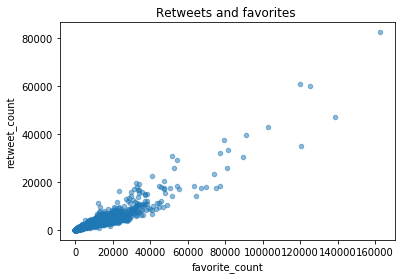

In [214]:
df.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5)
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.title('Retweets and favorites ')

* We can say that the correlation shows us that retweet is high correlated with favorites.

###  The Repartition Of The Dog Stages

(-1.288268191449591,
 1.2310305760057396,
 -1.2401381220397572,
 1.2110819987279693)

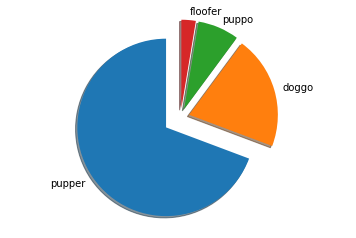

In [215]:
dog_stage_count = list(df[df['dog_type'] != 'None']['dog_type'].value_counts())[0:4]
dog_type = df[df['dog_type'] != 'None']['dog_type'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_type, shadow = True, startangle = 90)
ax1.axis('equal')

In [216]:
df[df['dog_type'] != 'None'].groupby('dog_type')['rating_numerator'].mean()

dog_type
doggo       9.904762
floofer    10.000000
pupper      9.599057
puppo       9.956522
Name: rating_numerator, dtype: float64

* Pupper is the most owned dog, but it has the lowest mean rating

###  Ratings Looking Like

In [217]:
rating_count = df['rating_denominator'].value_counts().head(10)
rating_count

10    1971
Name: rating_denominator, dtype: int64

### The Most Popular Dog Name

In [218]:
name_count = df['name'].value_counts()
name_count

None          533
Lucy           10
Oliver         10
Charlie        10
Cooper         10
Penny           9
Tucker          9
Winston         8
Sadie           8
Daisy           7
Lola            7
Toby            7
Bella           6
Jax             6
Stanley         6
Bo              6
Koda            6
Dave            5
Bailey          5
Rusty           5
Milo            5
Chester         5
Buddy           5
Louis           5
Oscar           5
Leo             5
Scout           5
Dexter          4
Bentley         4
Finn            4
             ... 
Logan           1
Jeffrie         1
Jim             1
Nimbus          1
Hercules        1
Longfellow      1
Petrick         1
Strudel         1
Corey           1
Emmy            1
Sprinkles       1
Carll           1
Raphael         1
Pawnd           1
Ole             1
Vinscent        1
Rodney          1
Bruiser         1
Ashleigh        1
Stephan         1
Cermet          1
Alfy            1
Fido            1
Jimbo           1
Klein     

# Saveing and Storeing The Clean Data

In [219]:
# to save the clean dataset for next sections
csv_cleann.to_csv('twitter_archive_master.csv', index=False)